# ⚜ 붓꽃 품종 분류

# 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [1]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

## 📦 데이터 준비

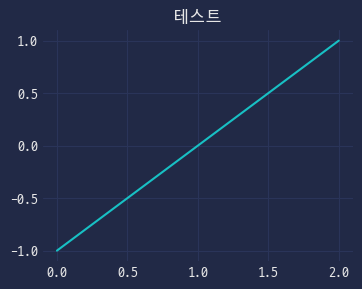

In [2]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

In [3]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
iris.keys()
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
 
# 종속변수
target = iris.target
target_name = iris.target_names
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


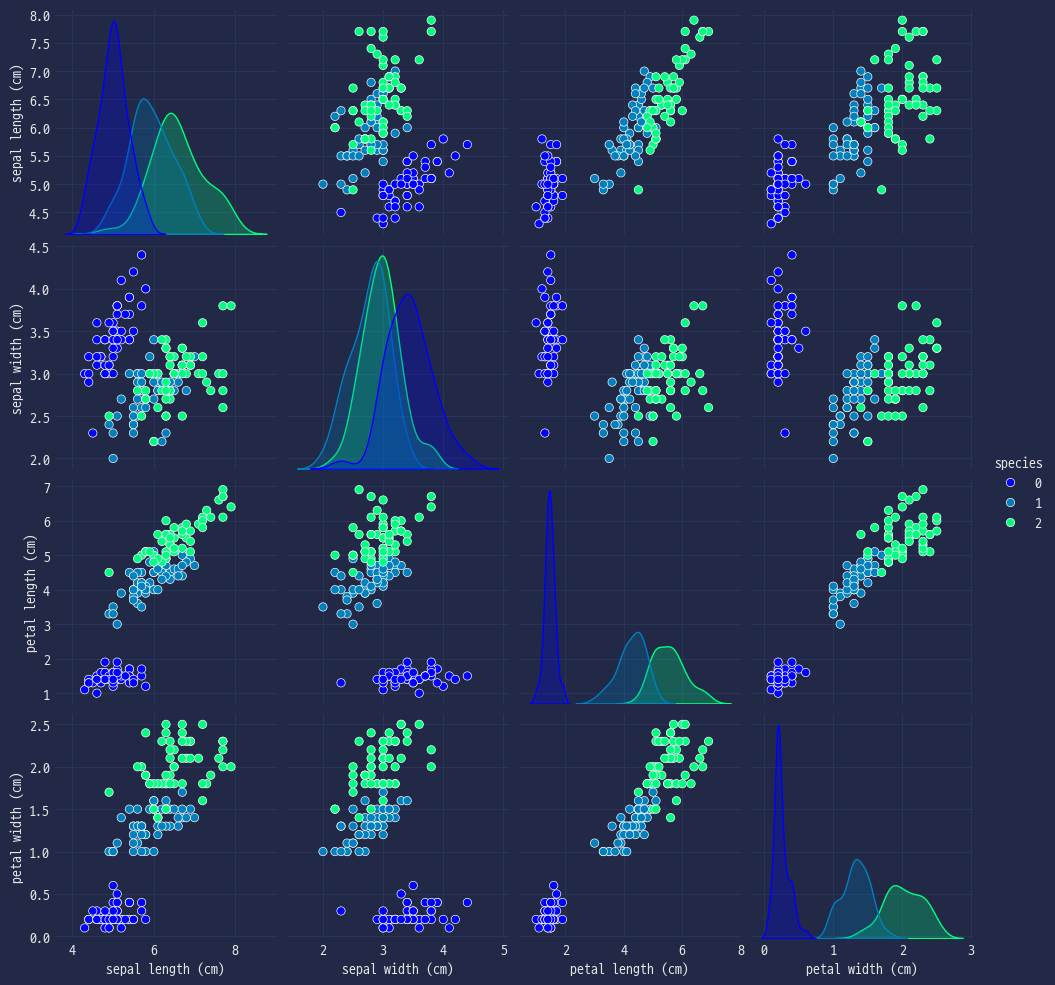

In [4]:
sns.pairplot(data=df_iris, hue='species', palette='winter')
plt.show()

## 🎛️ 독립변수와 종속변수

In [5]:
from sklearn.model_selection import train_test_split

X = feature
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.82, random_state=42, stratify=y)

## 🧠 모델 생성 및 학습

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score, classification_report

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('='*53)
print('# Train')
print(classification_report(y_train, pred_train))
print(f'훈련 정확도: {accuracy_score(y_train, pred_train)}')
print('-'*53)
print('# Test')
print(classification_report(y_test, pred_test))
print(f'테스트 정확도: {accuracy_score(y_test, pred_test)}')
print('='*53)

# Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        40

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

훈련 정확도: 1.0
-----------------------------------------------------
# Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28

테스트 정확도: 0.9642857142857143


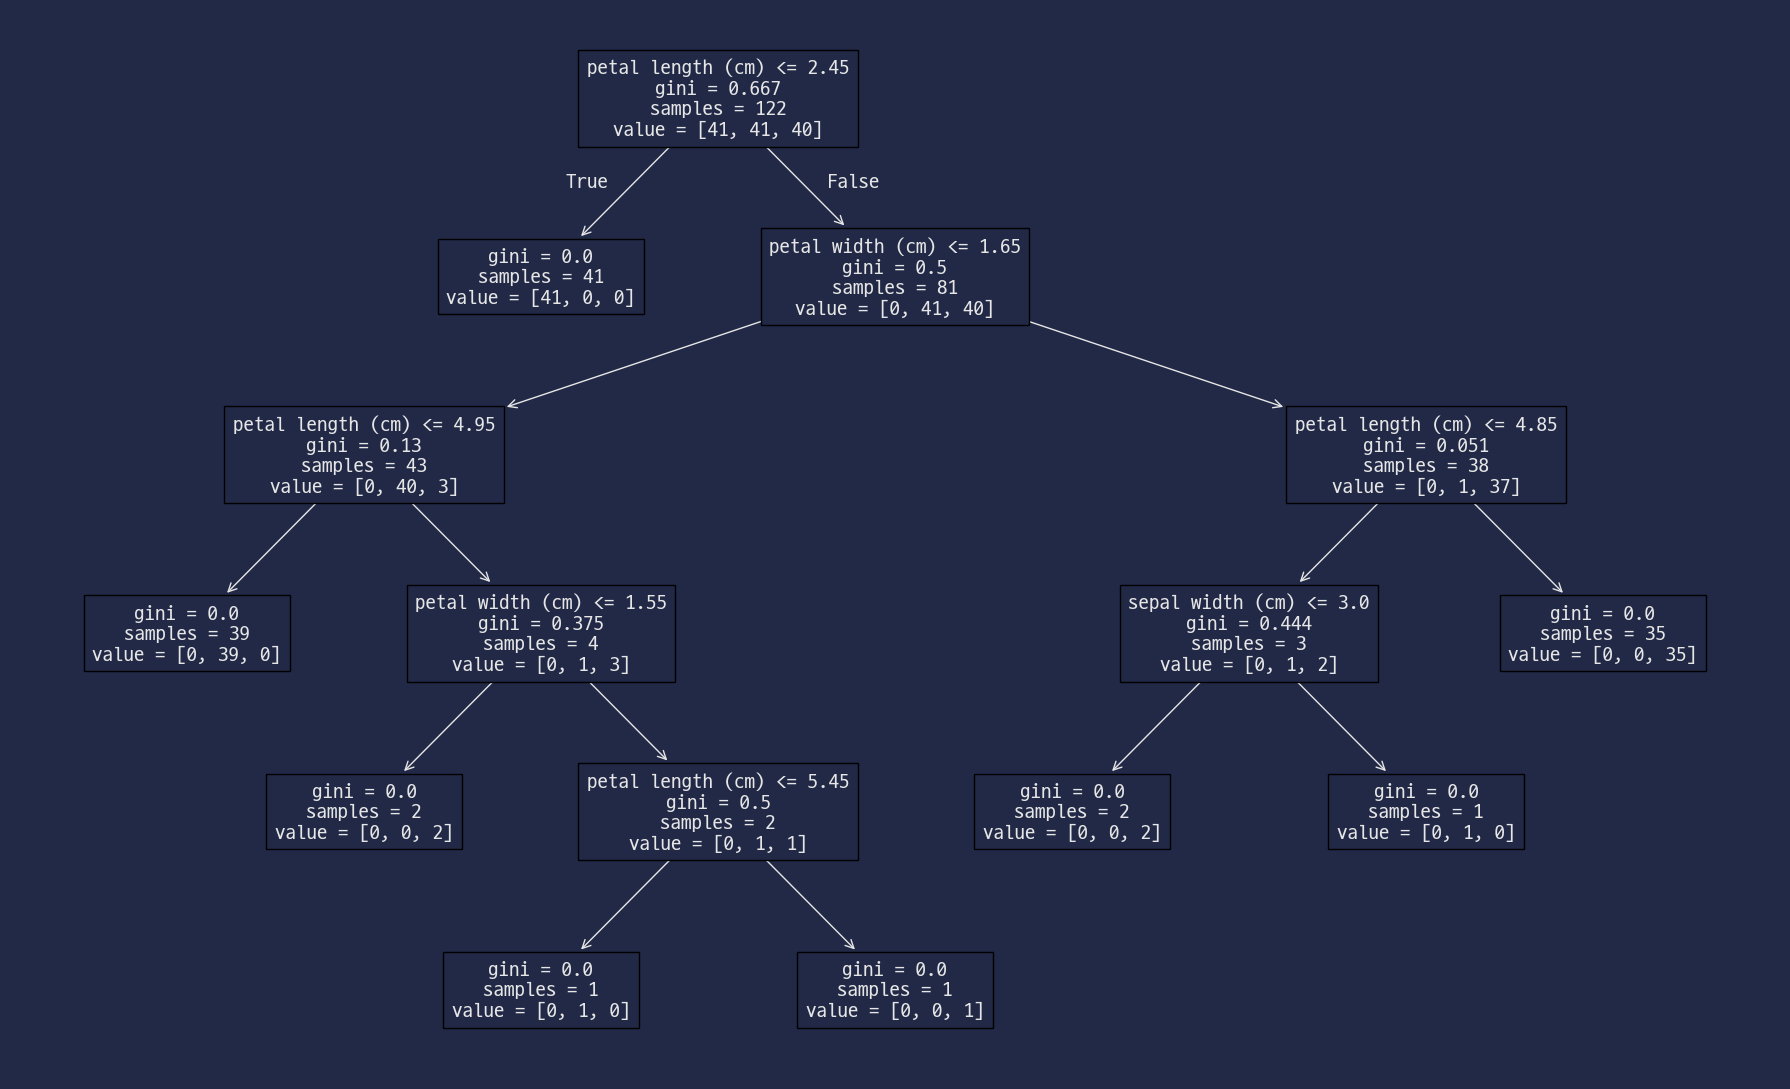

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 11))
plot_tree(model, feature_names=feature_name)
plt.tight_layout()
plt.show()

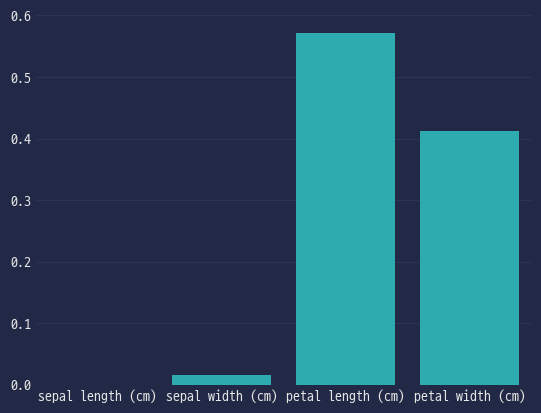

In [9]:
sns.barplot(x=feature_name, y=model.feature_importances_)
plt.show()

## ⚖️ 교차 검증을 직접 해보자

In [10]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for tr_idx, val_idx in kf.split(X_train):
    X_tr, y_tr = X_train[tr_idx], y_train[tr_idx]
    X_val, y_val = X_train[val_idx], y_train[val_idx]
    
    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)
    score = accuracy_score(y_val, pred)
    scores.append(score)

# 훈련 데이터셋에서 평가
print(f'훈련 데이터셋에 대한 정확도\t: {np.mean(scores)}')

# 테스트 데이터셋에서 평가
pred = model.predict(X_test)
print(f'테스트 데이터셋에 대한 정확도\t: {accuracy_score(y_test, pred)}')

훈련 데이터셋에 대한 정확도	: 0.9513333333333334
테스트 데이터셋에 대한 정확도	: 0.9642857142857143


## 🧮 하이퍼파라미터 튜닝

In [11]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 탐색할 하이퍼파라미터 범위
params = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

gscv = GridSearchCV(model, param_grid=params, cv=kf, refit=True)
display(gscv.fit(X_train, y_train))
print(
    f'최적 파라미터\t\t: {gscv.best_params_}\n'
    f'훈련 데이터셋에 대한 정확도\t: {gscv.best_score_}'
)

best_model = gscv.best_estimator_ 
pred = best_model.predict(X_test)
print(f'테스트 데이터셋에 대한 정확도\t: {accuracy_score(y_test, pred)}')

# 자세한 결과
# result = pd.DataFrame(gscv.cv_results_)
# display(result)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 4, 6]})

최적 파라미터		: {'max_depth': 4, 'min_samples_split': 2}
훈련 데이터셋에 대한 정확도	: 0.9673333333333334
테스트 데이터셋에 대한 정확도	: 0.9285714285714286


### ⛰️ 랜덤 포레스트 모델의 경우

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

gscv = GridSearchCV(model, param_grid=params, cv=kf, refit=True)
display(gscv.fit(X_train, y_train))
print(
    f'최적 파라미터\t\t\t: {gscv.best_params_}\n'
    f'훈련 데이터셋에 대한 정확도\t: {gscv.best_score_}'
)

best_model = gscv.best_estimator_ 
pred = best_model.predict(X_test)
print(f'테스트 데이터셋에 대한 정확도\t: {accuracy_score(y_test, pred)}')

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 4, 6]})

최적 파라미터			: {'max_depth': 3, 'min_samples_split': 4}
훈련 데이터셋에 대한 정확도	: 0.959
테스트 데이터셋에 대한 정확도	: 0.9642857142857143
